# Exploratory Data Analysis: Adults

## Libraries and Dataframe

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pandas.read_csv('../Datasets/adult.csv')
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Columns

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


## Entropy

$ H(x) = - \sum_x P(x) log_2 P(x) $

In [8]:
def H(x):
    m = len(x)
    values, counts = np.unique(x, return_counts = True)
    nCategories = len(values)
    probabilities = counts/m
    h = -np.sum(probabilities*np.log2(probabilities))
    hMax = -np.log2(1/nCategories)
    return h, hMax

In [44]:
entropyAge = H(df['age'].values)
print("Entropy =", entropyAge[0], ";\tmaxEntropy =", entropyAge[1])

Entropy = 5.683324396400329 ;	maxEntropy = 6.189824558880018


In [50]:
valuesEntropy = np.zeros((len(df.columns), 2))
for i, f in enumerate(df.columns):
    entropy = H(df[f].values)
    valuesEntropy[i][0] = entropy[0]
    valuesEntropy[i][1] = entropy[1]
pandas.DataFrame(valuesEntropy, columns = ['Entropy', 'maxEntropy'], index = df.columns)

,Entropy,maxEntropy
age,5.683324,6.189825
workclass,1.647977,3.169925
education,2.931351,4.000000
education-num,2.931351,4.000000
marital-status,1.833649,2.807355
occupation,3.516903,3.906891
relationship,2.154424,2.584963
race,0.798741,2.321928
sex,0.915736,1.000000
hours-per-week,3.479565,6.554589


## Mutual Information

$ IM(x, y) = \sum_x \sum_y P(x, y) log_2 \frac{ P(x, y) }{ P(x)P(y) } $

In [70]:
def IM(x, y):
    df = pandas.DataFrame([x, y]).transpose().value_counts().reset_index().rename(columns={0: 'P(x, y)'})
    df['P(x, y)'] = df['P(x, y)']/df['P(x, y)'].sum()
    pX = df.groupby(x.name).sum()['P(x, y)'].to_dict()
    pY = df.groupby(y.name).sum()['P(x, y)'].to_dict()
    df['P(x)'] = [pX[iX] for iX in df[x.name]]
    df['P(y)'] = [pY[iY] for iY in df[y.name]]
    df['MI'] = df['P(x, y)']*np.log2(df['P(x, y)']/(df['P(x)']*df['P(y)']))
    return df['MI'].sum()

In [ ]:
valuesMI = np.zeros((len(df.columns), len(df.columns)))
for i, fUno in enumerate(df.columns):
    for j, fDos in enumerate(df.columns):
        if fUno != fDos:
            valuesMI[i][j] = IM(df[fUno], df[fDos])
matrixMI = pandas.DataFrame(valuesMI, columns = df.columns, index = df.columns)
matrixMI

In [ ]:
sns.heatmap(matrixMI)

## Count plot or rectangle plot

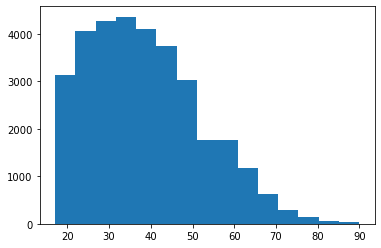

In [25]:
plt.figure()
plt.hist(df['age'].values, bins = 15)
plt.show()

## Comparing two features

## Insights